# Important notes regarding the final project:

1. Dataset

If you are having some difficulty with finding a dataset, just use the dataset that we provide to you. Finding the stuitable dataset for your analysis can take a lot of time.

The explanations of the NHANES dataset is written in the link below:

https://www.rdocumentation.org/packages/NHANES/versions/2.1.0/topics/NHANES

2. Most important lab notebooks

Lab 1-5, lab 9 (Confidence intervals), lab 10, lab 11 are the relevant notebooks for this final project. You don't need to know anything about simulations, probability, law of large numbers and central limit theorem to do this final project, though you may be welcome to use some of the concepts in your project.

3. Major things that you MUST include in your hypothesis testing (t test, chi-squared test, or ANOVA)

If you conduct a hypothesis test (t test, chi-squared test, or ANOVA), then you must include the following:

- Write which hypothesis test you used
- p-value (write p<0.001 if the p-value is small)
- 95% CI of mean + mean difference or proportion + proportion difference
- Statistical conclusion (were you able to reject the null?)
- Conclusion in simple English. If you were able to reject the null, what were you able to conclude?

After you finish writing 1 hypothesis testing, please make sure that you included these 5 points. If you forget to include some of them, you will lose some points in the data analysis section. You do not have to include standard deviation, median, skewness, etc, but you can if you would like to report the spread of the data.

4. Major things that you MUST include in your regression analysis:

- Scatter plot with the regression line (This would be data visualization section)
- Report F test (regression line is correct) --> If the p-value that you got in this F test is larger than 0.05, don't report the regression analysis
- Report the variables (what were your dependent and independent variables?)
- Report the regression equation that was obtained
- Report the p-value of coefficients
- If you examine the relationship between 2 numerical variables, please do include the Pearson correlation coefficient with the p-value
- Conclusion in simple English

After you finish your regression analysis, do not forget to include these points

### One more point:

A good report in regression analysis will examine some confounding variables that might affect the linear relationship. Does correlation imply causation? 

# How to seek help

If you encounter some errors in your code (especially in data visualization part), do not hesitate to seek help. I ask that you send the following to us if you need help:

1. ipynb file that you are working with
2. dataset

Even if you just send us the screenshot with errors, it would be difficult to fix the issue, as we can't understand how you did the data preprocessing. Also, unless you are working with me now, please send an email to both me and Charlie to seek help. While I'm happy to fix the errors, I don't have time to fix 20+ people's errors, and I'm sure that Charlie would be helpful for you.

# 1. Scatter plots

In previous labs, we dealt with analyzing categorical vs numerical or categorical vs categorical data. Here, we are interested in analyzing numerical vs numerical data.

For example, we might be interested in figuring out the relationship between height and weight. We know that tall people weigh more compared to short people, but in average, how much weight does a person gain per 1cm increase in height?

We might also be interested in finding out the relationship between time and numerical data. For example, we know that the number of COVID-19 cases has been increasing with time, but how can we quantify this rate?

Finally, we will be doing multiple regression analysis, where we want to predict a numerical data based on multiple numerical and categorical data.

The very first step in analyzing numerical vs numerical data is to create a scatter plot.

The code to create a scatter plot is given as below:
```Python
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(x, y, c='blue', edgecolors='none', s=30)
plt.title("Title", fontsize=20)
axs.set_xlabel("x-label", fontsize=18)
axs.set_ylabel("y-label", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()
```

Here, you can change the color in `c`, `x` defines the x variable and `y` defines the y variable. You can change the size of the dots by changing the value in `s`.

## Load NHANES dataset and get male + female adult dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/NHANES.csv')
df = df[['Gender', 'Age', 'Height', 'Weight', 'Pulse']]
df = df.dropna()

In [3]:
df

,Gender,Age,Height,Weight,Pulse
0,male,34,164.7,87.4,70.0
1,male,34,164.7,87.4,70.0
2,male,34,164.7,87.4,70.0
4,female,49,168.4,86.7,86.0
5,male,9,133.1,29.8,82.0
...,...,...,...,...,...
9994,male,28,177.3,92.3,68.0
9995,male,28,177.3,92.3,68.0
9997,male,27,175.8,96.7,74.0
9998,male,60,168.8,78.4,76.0


In [4]:
adult = df['Age'] >= 20
child = df['Age'] < 20

# Remember that == means a condition statement to find if two elements are the same
male = df['Gender'] == 'male'
female = df['Gender'] == 'female'

# We will create two separate dataframes for male and female

male_df = df[adult & male]
female_df = df[adult & female]

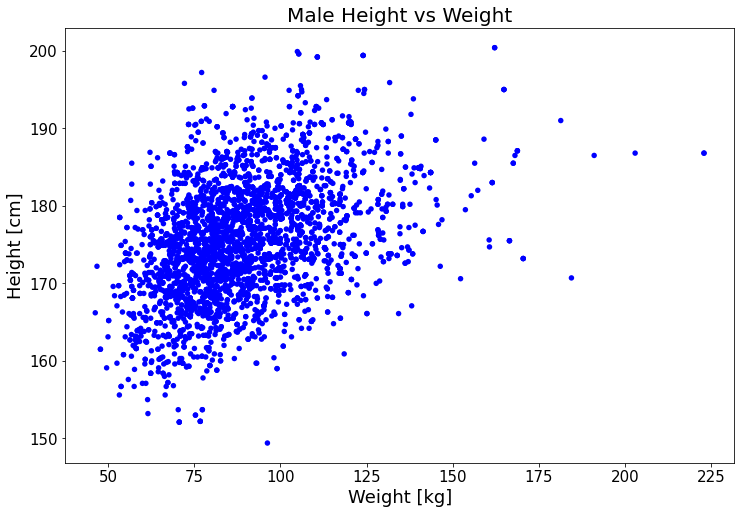

In [5]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(male_df['Weight'], male_df['Height'], c='blue', edgecolors='none', s=30)
plt.title("Male Height vs Weight", fontsize=20)
axs.set_xlabel("Weight [kg]", fontsize=18)
axs.set_ylabel("Height [cm]", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

While we some outliers, it seems that there is a positive correlation between height and weight. We can quantify this correlation by using Pearson Correlation Coefficient, which can be defined to be:

<img src='Image/correlation.png' width=600>

The code for obtaining the correlation coefficient is:
```Python
from scipy import stats
corr = stats.pearsonr(x, y)
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])
```

In [6]:
from scipy import stats
corr = stats.pearsonr(male_df['Weight'], male_df['Height'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])

Correlation coefficient: 0.40505669510264264
p-value: 2.7318766504257422e-135


Here, since the correlation coefficient is approximately 0.4, we see a weak/moderate positive linear relationship between male height and weight. The most important thing here is the correlation coefficient, not the p-value. Even though the p-value is extremely close to 0, it doesn't imply that we have a strong linear relationship between x and y.

Also, notice that the order doesn't matter:

In [7]:
corr = stats.pearsonr(male_df['Height'], male_df['Weight'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])

Correlation coefficient: 0.40505669510264264
p-value: 2.7318766504257422e-135


In social science dataset, correlation coefficient of 0.4 can also indicate a strong linear relationship between two variables. This is because there are many observations, and it would be very surprising if there are a perfect linear relationship between height and weight. Now, we will see a scatter plot of two two variables that aren't related:

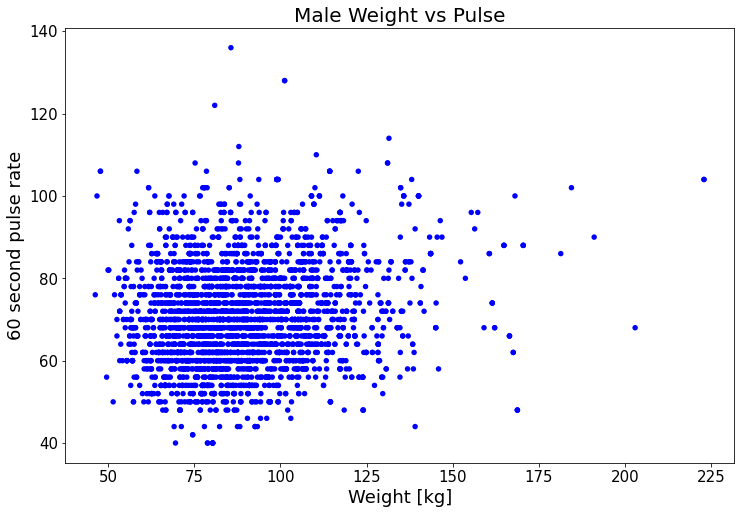

In [8]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(male_df['Weight'], male_df['Pulse'], c='blue', edgecolors='none', s=30)
plt.title("Male Weight vs Pulse", fontsize=20)
axs.set_xlabel("Weight [kg]", fontsize=18)
axs.set_ylabel("60 second pulse rate", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [9]:
corr = stats.pearsonr(male_df['Weight'], male_df['Pulse'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])

Correlation coefficient: 0.16628654054278538
p-value: 1.2174056004066377e-22


Even though the p-value is really small, the correlation coefficient is small, which indicates that there is only a weak positive relationship between weight and pulse rate.

We can add groups to the scatter plot by adding `axs.scatter()` line just like we did when we created a grouped histogram.

```Python
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(x, y, c='blue', edgecolors='none', s=30, label='group1')
axs.scatter(x, y, c='red', edgecolors='none', s=30, label='group2')
plt.title("Title", fontsize=20)
axs.set_xlabel("x-label", fontsize=18)
axs.set_ylabel("y-label", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
plt.show()
```

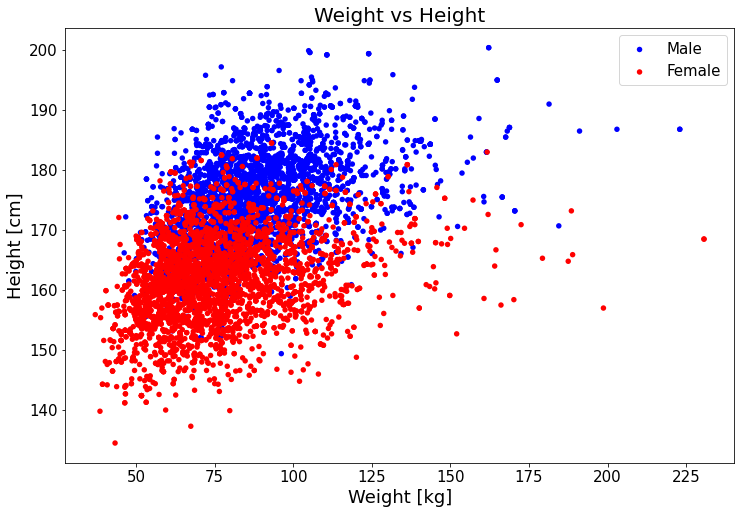

In [10]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(male_df['Weight'], male_df['Height'], c='blue', edgecolors='none', s=30, label='Male')
axs.scatter(female_df['Weight'], female_df['Height'], c='red', edgecolors='none', s=30, label='Female')
plt.title("Weight vs Height", fontsize=20)
axs.set_xlabel("Weight [kg]", fontsize=18)
axs.set_ylabel("Height [cm]", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
plt.show()

When many points are overlapping, it might be better to create two different scatterplots, instead of showing everything in one scatter plot. It might also be better to create scatter plots with empty circles.

NameError: name 'aeaa' is not defined

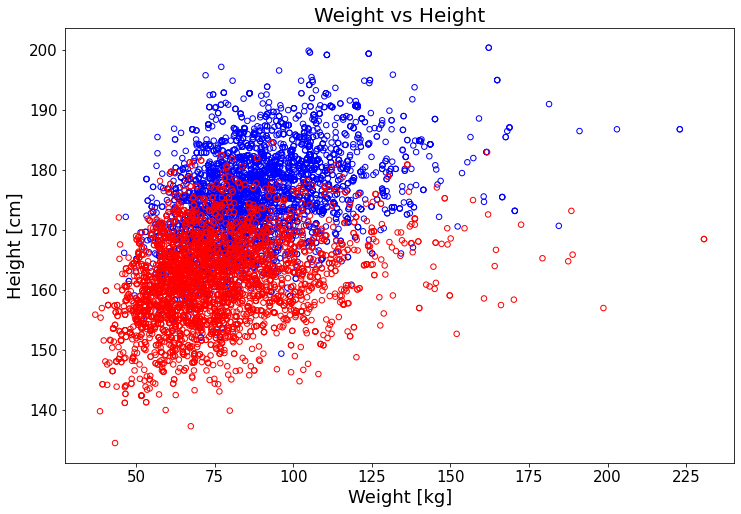

In [11]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(male_df['Weight'], male_df['Height'], c='none', edgecolors='blue', s=30, label='Male')
axs.scatter(female_df['Weight'], female_df['Height'], c='none', edgecolors='red', s=30, label='Female')
plt.title("Weight vs Height", fontsize=20)
axs.set_xlabel("Weight [kg]", fontsize=18)
axs.set_ylabel("Height [cm]", fontsize=18)
axs.tick_params(labelsize=15)
aeaa
axs.legend(prop={'size': 15})
plt.show()

## Scatter plot matrix

You can create a scatter plot matrix by using the following code:

1. Create a dataframe that only includes the columns that you would like to represent in the scatter plot
2. use the following Python code, where `df` is the name of the dataframe and `alpha` denotes the darkness of the color

```Python
pd.plotting.scatter_matrix(df, alpha=0.6, figsize=(12,6))
plt.show()
```

In [ ]:
df = pd.read_csv('Data/NHANES.csv')
df = df[['Weight', 'Height', 'Pulse', 'BPSysAve', 'BPDiaAve']]

In [ ]:
pd.plotting.scatter_matrix(df, alpha=0.6, figsize=(12,6))
plt.show()